## Import Libraries and Load Dataset



In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

file_path = 'Train.csv'  
df = pd.read_csv(file_path)
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## Clean Dataset

In [2]:
df = df.drop_duplicates()
df = df.dropna(subset=['Warehouse_block', 'Mode_of_Shipment'])
df = df.dropna()
df = df.drop_duplicates()
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## Constructing the Logistics Network

In [3]:
G = nx.Graph()

for _, row in df[['Warehouse_block', 'Mode_of_Shipment']].iterrows():
    warehouse = row['Warehouse_block']
    shipment_mode = row['Mode_of_Shipment']
    
    if G.has_edge(warehouse, shipment_mode):
        G[warehouse][shipment_mode]['weight'] += 1
    else:
        G.add_edge(warehouse, shipment_mode, weight=1)

print(f'Number of nodes: {G.number_of_nodes()}')
print(f'Number of edges: {G.number_of_edges()}')

Number of nodes: 8
Number of edges: 15


## Identifying Important Warehouses

In [4]:
centrality = {node: sum(weight for _, _, weight in G.edges(node, data='weight')) for node in G.nodes}

warehouse_blocks_centrality = {node: centrality[node] for node in centrality if node in df['Warehouse_block'].values}

top_3_warehouse_blocks = sorted(warehouse_blocks_centrality.items(), key=lambda x: x[1], reverse=True)[:3]

print('Top 3 Most Important Warehouse Blocks:', top_3_warehouse_blocks)

Top 3 Most Important Warehouse Blocks: [('F', 3666), ('D', 1834), ('A', 1833)]


## Visualizing the Logistics Network

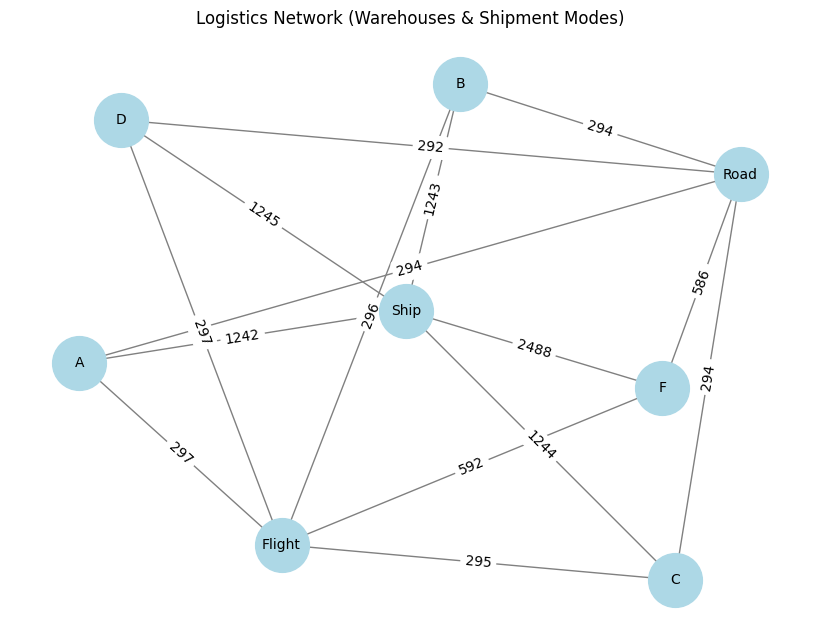

In [5]:
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', 
        node_size=1500, font_size=10)
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Logistics Network (Warehouses & Shipment Modes)')
plt.show()